In [1]:
!pip3 install --upgrade gdown py7zr seaborn scikit-learn scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 735.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 2.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 KB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 KB 4.0 MB/s eta 0:00:00a 0:00:01


In [3]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import cv2

Pobranie archiwum

In [4]:
import gdown
dataset_url = 'https://drive.google.com/uc?id=1OxWT8QRH4SATDPX2R7yzVn7hOLYKjFUC' # archiwum z danymi jest zapisane na dysku google pod adresem https://drive.google.com/file/d/1OxWT8QRH4SATDPX2R7yzVn7hOLYKjFUC/view?usp=drive_link
dataset_output = "dataset.zip"
gdown.download(dataset_url, dataset_output, quiet=True)

test_url = 'https://drive.google.com/uc?id=1o2U_Zw9WcPhT4ltnQMG9VbEgRxJgi826' # archiwum z danymi jest zapisane na dysku google pod adresem https://drive.google.com/file/d/1OxWT8QRH4SATDPX2R7yzVn7hOLYKjFUC/view?usp=drive_link
test_output = "test.zip"
gdown.download(test_url, test_output, quiet=True)


'test.zip'

In [5]:
!unzip -q './dataset.zip'
!unzip -q './test.zip'
!ls

archive			   dataset.zip		  owndataset  test.zip
Copy_of_TWM_projekt.ipynb  extract_background.py  processed


Wizualizacja losowych próbek danych

In [ ]:
# !rm -rf 'view?usp=sharing'
# !ls archive/asl_dataset

In [10]:
import glob
dataset_images = glob.glob('./archive/asl_dataset/*/*.jpeg')
len(dataset_images)
images = dataset_images
# print(images)

In [11]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import cv2

# Function to create dataset from a list of image paths
def create_dataset(image_paths):
    data = []
    for path in image_paths:
        parts = path.split('/')
        # Assuming the class label is always the second to last element in the path
        label = parts[-2]
        data.append({'path': path, 'label': label})

    # Convert the list to a DataFrame
    df = pd.DataFrame(data)
    return df

# Function to preprocess images into grayscale
def preprocess_image(image_path, size=(28, 28)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
    img = cv2.resize(img, size)  # Resize image to the desired size
    return img  # Return image as is, pixel values will be 0 to 255


# # Create the dataset
dataset = create_dataset(images)
dataset.to_csv('dataset.csv', index=False)

train_labels = pd.read_csv('./dataset.csv')
train_labels['label'].unique()
print(dataset.head())

X = np.zeros((len(dataset), 28, 28), dtype=np.uint8)  # Image data array
Y = []  # Labels array

# Fill the arrays with preprocessed images and labels
for index, row in dataset.iterrows():
    img = preprocess_image(row['path'])
    X[index] = img  # Store the image data
    Y.append([row['label']])  # Store the label

# Convert Y to a NumPy array for consistency
Y = np.array(Y)

# Print the shapes to confirm dimensions
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)



                                                path label
0  ./archive/asl_dataset/3/hand5_3_bot_seg_4_crop...     3
1  ./archive/asl_dataset/3/hand2_3_dif_seg_2_crop...     3
2  ./archive/asl_dataset/3/hand2_3_bot_seg_1_crop...     3
3  ./archive/asl_dataset/3/hand1_3_top_seg_3_crop...     3
4  ./archive/asl_dataset/3/hand2_3_dif_seg_1_crop...     3
Shape of X: (2515, 28, 28)
Shape of Y: (2515, 1)


In [ ]:
print(len(X))
print(len(Y))

X.shape

2515
2515


(2515, 28, 28)

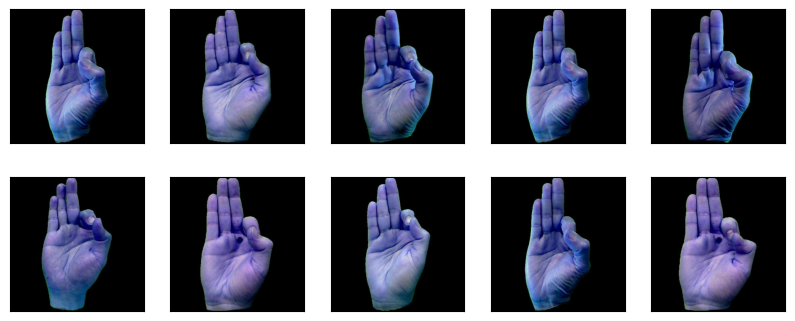

In [12]:
fig = plt.figure(figsize=(10, 4))

i = 0
for index, row in dataset[200:210].iterrows():
    fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im_gray = cv2.imread(row['path'])

    # print(row['label'])

    plt.imshow(im_gray)

    i = i + 1

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
Y = pd.DataFrame(encoder.fit_transform(Y).toarray())
Y = np.array(Y, dtype=np.float32)

In [ ]:
Y[200:210]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.,

In [14]:
encoder.inverse_transform(Y[200:205])

array([['f'],
       ['f'],
       ['f'],
       ['f'],
       ['f']], dtype='<U1')

In [16]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

2024-06-09 19:51:50.224557: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 19:51:51.245473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=32, test_size=0.20, shuffle=True)

# obtain validation dataset
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=32, test_size=0.15, shuffle=True)

X_train = X_train.reshape(1710, 28, 28, 1)
X_val = X_val.reshape(302, 28, 28, 1)
X_test = X_test.reshape(503, 28, 28, 1)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_val /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_val.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (1710, 28, 28, 1)
Validation matrix shape (302, 28, 28, 1)
Testing matrix shape (503, 28, 28, 1)


In [ ]:
print(len(X_test))
print(len(Y_test))
print(len(X_val))
print(len(Y_val))
print(len(X_train))
print(len(Y_train))

503
503
302
302
1710
1710


In [18]:
def build_basic_model() -> Model:
  basic_model = Sequential()
  basic_model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:],))
  basic_model.add(Activation('relu'))
  basic_model.add(Conv2D(32, (3, 3)))
  basic_model.add(Activation('relu'))
  basic_model.add(MaxPooling2D(pool_size=(2, 2)))
  basic_model.add(Dropout(0.25))

  basic_model.add(Conv2D(64, (3, 3), padding='same'))
  basic_model.add(Activation('relu'))
  basic_model.add(Conv2D(64, (3, 3)))
  basic_model.add(Activation('relu'))
  basic_model.add(MaxPooling2D(pool_size=(2, 2)))
  basic_model.add(Dropout(0.25))

  basic_model.add(Flatten())
  basic_model.add(Dense(512))
  basic_model.add(Activation('relu'))
  basic_model.add(Dropout(0.5))
  basic_model.add(Dense(len(encoder.categories_[0])))
  basic_model.add(Activation('softmax'))
  return basic_model

In [19]:
results_acc = []
results_val_acc = []


basic_model = build_basic_model()
basic_model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

basic_model_history = basic_model.fit(X_train, Y_train,
            batch_size=32,
            epochs= 10,
            validation_data=(X_val, Y_val),
            shuffle=True)

results_acc.append(basic_model_history.history['accuracy'][-1])
results_val_acc.append(basic_model_history.history['val_accuracy'][-1])

results_acc = np.array(results_acc)
results_val_acc = np.array(results_val_acc)

/home/michal/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-09 19:52:03.380870: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.0660 - loss: 3.4817 - val_accuracy: 0.5728 - val_loss: 1.4805
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5203 - loss: 1.5238 - val_accuracy: 0.8212 - val_loss: 0.5261
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7683 - loss: 0.7114 - val_accuracy: 0.8907 - val_loss: 0.3283
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8419 - loss: 0.4759 - val_accuracy: 0.8775 - val_loss: 0.3376
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8688 - loss: 0.3983 - val_accuracy: 0.9106 - val_loss: 0.2340
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8896 - loss: 0.2951 - val_accuracy: 0.9404 - val_loss: 0.1636
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9197 - loss: 0.2270 - val_accuracy: 0.9272 - val_loss: 0.1832
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9302 - loss: 0.1761 - val_accuracy: 0.9503 - v

Podział na zbiór uczący, walidacyjny i testowy

In [20]:
print(f'Training acc - std: {np.std(results_acc)}, mean: {np.mean(results_acc)}')
print(f'Validation acc - std: {np.std(results_val_acc)}, mean: {np.mean(results_val_acc)}')

Training acc - std: 0.0, mean: 0.9479532241821289
Validation acc - std: 0.0, mean: 0.9503311514854431


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


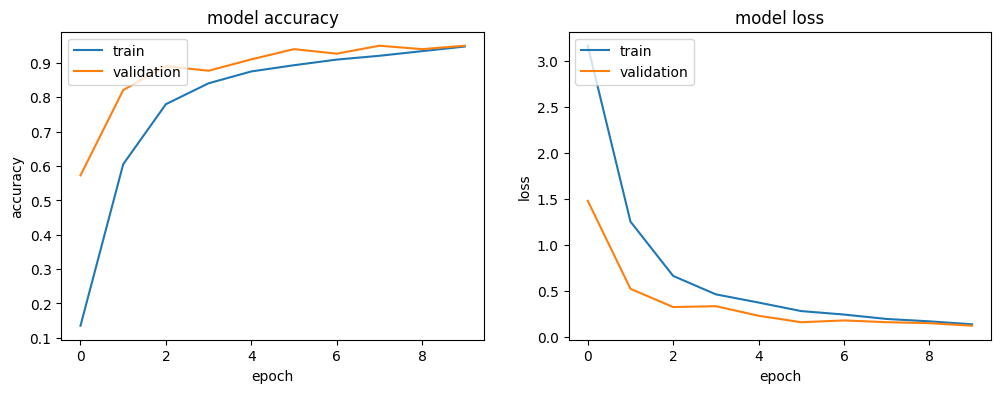

In [21]:
# list all data in history
print(basic_model_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(basic_model_history.history['accuracy'])
plt.plot(basic_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(basic_model_history.history['loss'])
plt.plot(basic_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Zrobilismy własny sbiór danych. Sprawdzimy czy model działa na nim. Najpierw pobieranie.


In [ ]:
# To do usunięcia raczej, lecimy

# train_data = []
# train_data_classes = []

# validate_data = []
# validate_data_classes = []

# test_data = []
# test_data_classes = []

# pattern = r'hand(\d)'

# for index, row in df.iterrows():
#     filename = row["filename"]
#     klass = row["class"]

#     match = re.search(pattern, filename)
#     if not match:
#         raise RuntimeError("Every file name should match the pattern")

#     matched_substring = match.group()
#     digit = match.group(1)

#     if digit in ["1", "2", "3"]:
#         train_data.append(filename)
#         train_data_classes.append(klass)
#     elif digit in ["4"]:
#         validate_data.append(filename)
#         validate_data_classes.append(klass)
#     elif digit in ["5"]:
#         test_data.append(filename)
#         test_data_classes.append(klass)



# df_train = pd.DataFrame({"filename": train_data, "class": train_data_classes})
# df_validate = pd.DataFrame({"filename": validate_data, "class": validate_data_classes})
# df_test = pd.DataFrame({"filename": test_data, "class": test_data_classes})

# print(df_train.head)
# print(df_validate.head)
# print(df_test.head)

Augmentacja. Ogolnie tutaj tylko augmentuję 5 losowych obrazków. Żeby to wpiąć do naszego kodu to bym to widział tak, że używamy do uczenia zbioru z neta + np jego powielonej kopii, tylko że z tą augmentacją o przesunięcie + z uagmentacją o obrót



0.041666666666666664


Text(0.78, 0.95, 'rotated')

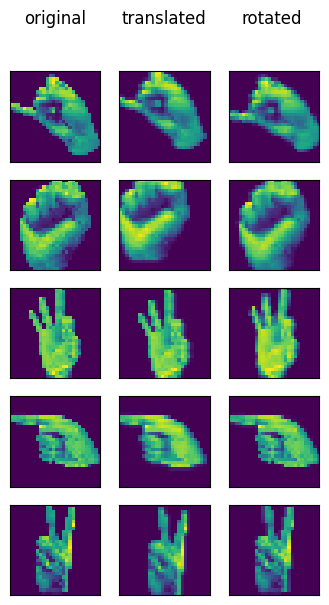

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import RandomTranslation, RandomRotation
import random


data_translation = Sequential()
data_translation.add(
    RandomTranslation(
        height_factor=0.15, # 0.15 of image height
        width_factor=0.15,
        fill_mode="constant",
        fill_value=0.0,
    )
)

rotation_angle = 15/360 # 15 degress
print(rotation_angle)
data_rotation = Sequential()
data_rotation.add(
    RandomRotation(
        factor=rotation_angle,
        fill_mode="constant",
        fill_value=0.0,
    )
)


fig = plt.figure(figsize=(4, 6.8))
i = 0
for image in X_train[0:5]:

    translation_image = data_translation(image)
    rotation_image = data_rotation(image)

    fig.add_subplot(5, 3, 1 + 3 * i, xticks=[], yticks=[])
    plt.imshow(image)


    fig.add_subplot(5, 3, 1 + 3 * i + 1, xticks=[], yticks=[])
    plt.imshow(translation_image)
    fig.add_subplot(5, 3, 1 + 3 * i + 2, xticks=[], yticks=[])
    plt.imshow(rotation_image)

    i = i + 1


offests = [0.24, 0.51, 0.78]
fig.text(offests[0], 0.95, "original", ha='center', fontsize=12)
fig.text(offests[1], 0.95, "translated", ha='center', fontsize=12)
fig.text(offests[2], 0.95, "rotated", ha='center', fontsize=12)

HOG + SVM klasyfikator

In [82]:
import numpy as np
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Funkcja do ekstrakcji cech HOG z obrazu
def extract_hog_features(image):
    resized_image = resize(image, (128, 64))  # Rozmiar typowy dla HOG
    hog_features, hog_image = hog(resized_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=2)
    return hog_features

# Przygotowanie danych
def prepare_data(images, labels):
    features = [extract_hog_features(image) for image in images]
    return np.array(features), np.array(labels)


# Ekstrakcja cech HOG
X_train_svm, Y_train_svm = prepare_data(X_train, encoder.inverse_transform(Y_train))


X_test_svm, Y_test_svm = prepare_data(X_test, encoder.inverse_transform(Y_test))

# Stworzenie i trenowanie modelu SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, Y_train_svm)

# Predykcje na danych testowych
y_pred = svm_model.predict(X_test_svm)

# Ocena modelu
accuracy = accuracy_score(Y_test_svm, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

/home/michal/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 97.22%
